**IMPORT LIBRARIES**

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

**DEFINE FUNCTIONS**

In [3]:
# initialize random weights and biases
def init(input, p1, p2, p3, output, mu, sigma):

  W1 = tf.cast(tf.Variable(tf.random.normal([input, p1], mean = mu, stddev = sigma, seed = 1)), dtype = tf.float32)
  b1 = tf.cast(tf.Variable(tf.random.normal([p1], mean = mu, stddev = sigma, seed = 1)), dtype = tf.float32)

  W2 = tf.cast(tf.Variable(tf.random.normal([p1, p2], mean = mu, stddev = sigma, seed = 1)), dtype = tf.float32)
  b2 = tf.cast(tf.Variable(tf.random.normal([p2], mean = mu, stddev = sigma, seed = 1)), dtype = tf.float32)

  W3 = tf.cast(tf.Variable(tf.random.normal([p2, p3], mean = mu, stddev = sigma, seed = 1)), dtype = tf.float32)
  b3 = tf.cast(tf.Variable(tf.random.normal([p3], mean = mu, stddev = sigma, seed = 1)), dtype = tf.float32)

  W4 = tf.cast(tf.Variable(tf.random.normal([p3, output], mean = mu, stddev = sigma, seed = 1)), dtype = tf.float32)
  b4 = tf.cast(tf.Variable(tf.random.normal([output], mean = mu, stddev = sigma, seed = 1)), dtype = tf.float32)

  return W1, W2, W3, W4, b1, b2, b3, b4


# function for forward propogation
def forward(W1, W2, W3, W4, b1, b2, b3, b4, X):
  
  z1 = tf.add(tf.matmul(X, W1), b1)   
  a1 = sigmoid(z1)   

  z2 = tf.add(tf.matmul(a1, W2), b2)
  a2 = sigmoid(z2)   

  z3 = tf.add(tf.matmul(a2, W3), b3) 
  a3 = sigmoid(z3)     

  z4 = tf.add(tf.matmul(a3, W4), b4)
  output = softmax(z4)   

  return input, z1, a1, z2, a2, z3, a3, z4, output


# function for backward propogation
def backward(batch,input, z1, a1, z2, a2, z3, a3, z4, output, y_actual, W1,W2,W3,W4):

  dZ4 = tf.math.subtract(output, y_actual)/len(y_actual)
  dA3 = tf.linalg.matmul(dZ4, tf.transpose(W4))

  dW4 = tf.linalg.matmul( tf.transpose(a3), dZ4)
  dB4 = tf.Variable(dZ4)
  dA3 = tf.linalg.matmul(dZ4, tf.transpose(W4))
  g_dash_Z3 = tf.math.multiply(a3, (1-a3))
  dZ3 = tf.math.multiply(dA3, g_dash_Z3)

  dW3 = tf.linalg.matmul( tf.transpose(a2), dZ3)
  dB3 = tf.Variable(dZ3)
  dA2 = tf.linalg.matmul(dZ3, tf.transpose(W3))
  g_dash_Z2 = tf.math.multiply(a2, (1-a2))
  dZ2 = tf.math.multiply(dA2, g_dash_Z2)

  dW2 = tf.linalg.matmul( tf.transpose(a1), dZ2)
  dB2 = tf.Variable(dZ2)
  dA1 = tf.linalg.matmul(dZ2, tf.transpose(W2))
  g_dash_Z1 = tf.math.multiply(a1, (1-a1))
  dZ1 = tf.math.multiply(dA1, g_dash_Z1)

  dW1 = tf.linalg.matmul( tf.transpose(input), dZ1)
  dB1 = tf.Variable(dZ1)

  return dW1, dW2, dW3, dW4, dB1, dB2, dB3, dB4


# fuction to update weights and biases
def update(W1, W2, W3, W4, b1, b2, b3, b4, dW1, dW2, dW3, dW4, db1, db2, db3, db4, alpha):
  
  W1 = tf.math.subtract(W1, tf.math.scalar_mul(alpha, dW1))
  W2 = tf.math.subtract(W2, tf.math.scalar_mul(alpha, dW2))
  W3 = tf.math.subtract(W3, tf.math.scalar_mul(alpha, dW3))
  W4 = tf.math.subtract(W4, tf.math.scalar_mul(alpha, dW4))

  b1 = tf.math.subtract(b1, tf.math.scalar_mul(alpha, db1))
  b2 = tf.math.subtract(b2, tf.math.scalar_mul(alpha, db2))
  b3 = tf.math.subtract(b3, tf.math.scalar_mul(alpha, db3))
  b4 = tf.math.subtract(b4, tf.math.scalar_mul(alpha, db4))

  return W1, W2, W3, W4, b1, b2, b3, b4


# define loss function
def loss(y_actual, y_predict):
  logy = tf.math.log(y_predict)
  err = tf.math.multiply(y_actual, logy)
  loss = tf.math.reduce_sum(err)/len(y_actual)
  return loss


# define sigmoid activation function
def sigmoid(x):
  return 1/(1 + tf.math.exp(-x))

# define softmax activation function
def softmax(x):
  exps = tf.math.exp(x - tf.reduce_max(x, axis=1, keepdims=True))
  return exps/tf.reduce_sum(exps, 1, keepdims=True)

# QUESTION 1 - MNIST DATASET



**LOAD DATASET**

In [25]:
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# flatten the train and test images

tf.print("Dimension of loaded train images set:", train_images.shape)
train_images = train_images.reshape(train_images.shape[0],train_images.shape[1]*train_images.shape[2])
tf.print("Dimension of flattened train images set:", train_images.shape)

tf.print("Dimension of loaded test images set:", test_images.shape)
test_images = test_images.reshape(test_images.shape[0],test_images.shape[1]*test_images.shape[2])
tf.print("Dimension of flattened test images set:", test_images.shape)

# encode train labels into one hot encoding
train_labels_ori = train_labels
y = np.zeros((train_images.shape[0],10))
for i in range(train_images.shape[0]):
  y[i][train_labels[i]]  = 1
train_labels = y
tf.print("Dimension of one hot encoded train labels:", train_labels.shape)

# typecast train and test images into float 

train_images = tf.cast(train_images,dtype = tf.float32)
train_labels = tf.cast(train_labels,dtype = tf.float32)
test_images = tf.cast(test_images,dtype = tf.float32)
test_labels = tf.cast(test_labels,dtype = tf.float32)


11493376/11490434 [==============================] - 0s 0us/step
Dimension of loaded train images set: (60000, 28, 28)
Dimension of flattened train images set: (60000, 784)
Dimension of loaded test images set: (10000, 28, 28)
Dimension of flattened test images set: (10000, 784)
Dimension of one hot encoded train labels: (60000, 10)


**BUILD AND TRAIN THE MODEL**

In [28]:
epochs = 100
alpha = 0.1
batch_size = 256
input = train_images.shape[1]
p1 = 512
p2 = 256
p3 = 128
output = 10
mu = 0
sigma = 1

W1, W2, W3, W4, b1, b2, b3, b4 = init(input, p1, p2, p3, output, mu, sigma)

error = []
epoch_acc =[]

for i in range(epochs):
  print("\r Epoch "+str(i), end="")
  epoch_errors = []

  for j in range(train_images.shape[0]//batch_size):

    x = train_images[j*batch_size:(j+1)*batch_size]
    y = train_labels[j*batch_size:(j+1)*batch_size]
    input, z1, a1, z2, a2, z3, a3, z4, output = forward(W1, W2, W3, W4, b1, b2, b3, b4, x)
    er = loss(y, output)
    epoch_errors.append(er)
    dW1, dW2, dW3, dW4, dB1, dB2, dB3, dB4 = backward(batch_size, x, z1, a1, z2, a2, z3, a3, z4, output, y, W1, W2, W3, W4)
    W1, W2, W3, W4, b1, b2, b3, b4 =  update(W1, W2, W3, W4, b1, b2, b3, b4, dW1, dW2, dW3, dW4, dB1, dB2, dB3, dB4, alpha)
    
  error.append(np.mean(epoch_errors))

  acc = []

  for b in range(train_images.shape[0]//batch_size):

    x = train_images[b*batch_size:(b+1)*batch_size]
    y = train_labels_ori[b*batch_size:(b+1)*batch_size]

    input, z1, a1, z2, a2, z3, a3, z4, output = forward(W1, W2, W3, W4, b1, b2, b3, b4, x)
    pred = tf.math.argmax(output, axis = 1)
    batch_accuracy = tf.reduce_mean(tf.cast(tf.equal(pred, tf.cast(y, dtype=tf.int64)), tf.float64))
    acc.append(batch_accuracy*100)  
    
  epoch_acc.append(sum(acc)/len(acc))

 Epoch 99

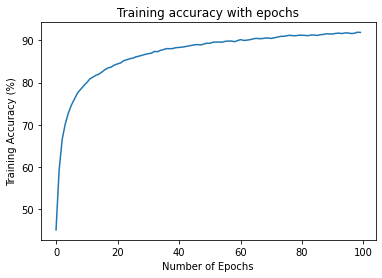

In [29]:
# check training accuracy with epoch
plt.plot(epoch_acc)
plt.title("Training accuracy with epochs")
plt.xlabel("Number of Epochs")
plt.ylabel("Training Accuracy (%)")
plt.show()

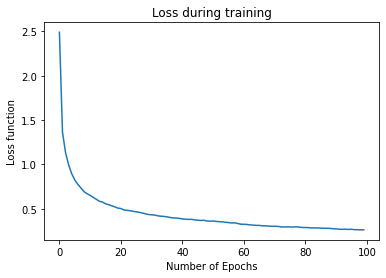

In [102]:
# check training loss
error =  [abs(ele) for ele in error] 
plt.plot(error)
plt.title("Loss during training")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss function")
plt.show()

**TEST THE MODEL AND PRINT SAMPLE CONFUSION MATRIX**

In [103]:
acc = []

for b in range(test_images.shape[0]//batch_size):

  x = test_images[b*batch_size:(b+1)*batch_size]
  y = test_labels[b*batch_size:(b+1)*batch_size]

  input, z1, a1, z2, a2, z3, a3, z4, output = forward(W1, W2, W3, W4, b1, b2, b3, b4, x)
  pred = tf.math.argmax(output, axis = 1)
  batch_accuracy = tf.reduce_mean(tf.cast(tf.equal(pred, tf.cast(y, dtype=tf.int64)), tf.float64))
  acc.append(batch_accuracy*100)  
  
tf.print("Test Accuracy: ", sum(acc)/len(acc), "% \n")
tf.print("Confusion Matrix:")
tf.print(tf.math.confusion_matrix(tf.cast(y, dtype=tf.int64), pred), summarize=-1)

Test Accuracy:  90.494791666666671 % 

Confusion Matrix:
[[25 0 0 0 0 0 1 0 0 0]
 [0 30 0 0 0 0 0 0 0 0]
 [5 0 12 1 0 0 0 2 4 0]
 [0 0 1 20 0 0 0 1 3 0]
 [0 0 0 0 24 2 0 0 0 1]
 [4 0 0 2 0 10 3 0 0 0]
 [1 0 0 1 0 0 24 0 0 0]
 [0 0 0 0 0 0 0 33 0 0]
 [0 1 1 0 0 1 0 0 22 1]
 [0 0 0 0 5 0 0 1 2 12]]


In [104]:
acc = []

for b in range(test_images.shape[0]//batch_size):

  x = train_images[b*batch_size:(b+1)*batch_size]
  y = train_labels_ori[b*batch_size:(b+1)*batch_size]

  input, z1, a1, z2, a2, z3, a3, z4, output = forward(W1, W2, W3, W4, b1, b2, b3, b4, x)
  pred = tf.math.argmax(output, axis = 1)
  batch_accuracy = tf.reduce_mean(tf.cast(tf.equal(pred, tf.cast(y, dtype=tf.int64)), tf.float64))
  acc.append(batch_accuracy*100)  
  
tf.print("Train Accuracy: ", sum(acc)/len(acc), "% \n")
tf.print("Confusion Matrix:")
tf.print(tf.math.confusion_matrix(tf.cast(y, dtype=tf.int64), pred), summarize=-1)

Train Accuracy:  92.287660256410263 % 

Confusion Matrix:
[[29 0 0 0 0 0 0 0 0 0]
 [0 25 0 0 0 0 0 0 0 0]
 [0 0 28 0 0 0 0 0 1 0]
 [1 0 0 23 0 1 0 0 0 0]
 [0 0 0 0 14 0 0 0 1 1]
 [0 0 0 0 0 19 1 0 1 0]
 [0 0 0 0 0 0 25 0 0 0]
 [0 1 1 0 0 0 0 22 0 0]
 [0 1 1 1 0 0 0 0 30 0]
 [0 0 0 0 1 0 0 1 0 27]]


**OBSERVE EFFECT OF ACTIVATION FUNCTION**

Important note - since this is a muticlass classification, softmax works best for the output layer. <br>
Options for hidden layer - sigmoid, relu, tanh, etc. <br>
Observation - relu has no positive upper bound so it may give large values which may be a problem because the final layer is softmax which will map majority values close to 1 and hence will be unable to distinguish between different classes. So sigmoid is a better option for hidden layers provided the network is not extremely deep to cause vanishing gradients. tanh performs comparable to sigmoid.

**OBSERVE EFFECT OF BATCH SIZE**

In [122]:
epochs = 100
alpha = 0.1
mu = 0
sigma = 1
batch_sizes = [128, 256, 512, 1024, test_images.shape[0]]

batch_acc = []

for batch_size in batch_sizes:
  
  input = train_images.shape[1]
  p1 = 512
  p2 = 256
  p3 = 128
  output = 10

  W1, W2, W3, W4, b1, b2, b3, b4 = init(input, p1, p2, p3, output, mu, sigma)

  for i in range(epochs):
    
    for j in range(train_images.shape[0]//batch_size):

      x = train_images[j*batch_size:(j+1)*batch_size]
      y = train_labels[j*batch_size:(j+1)*batch_size]
    
      input, z1, a1, z2, a2, z3, a3, z4, output = forward(W1, W2, W3, W4, b1, b2, b3, b4, x)
      dW1, dW2, dW3, dW4, dB1, dB2, dB3, dB4 = backward(batch_size, x, z1, a1, z2, a2, z3, a3, z4, output, y, W1, W2, W3, W4)
      W1, W2, W3, W4, b1, b2, b3, b4 =  update(W1, W2, W3, W4, b1, b2, b3, b4, dW1, dW2, dW3, dW4, dB1, dB2, dB3, dB4, alpha)

  acc = []

  for b in range(test_images.shape[0]//batch_size):

    x = test_images[b*batch_size:(b+1)*batch_size]
    y = test_labels[b*batch_size:(b+1)*batch_size]

    input, z1, a1, z2, a2, z3, a3, z4, output = forward(W1, W2, W3, W4, b1, b2, b3, b4, x)
    pred = tf.math.argmax(output, axis = 1)
    batch_accuracy = tf.reduce_mean(tf.cast(tf.equal(pred, tf.cast(y, dtype=tf.int64)), tf.float64))
    acc.append(batch_accuracy*100)  
    
  batch_acc.append(sum(acc)/len(acc))
  tf.print("Batch size:", batch_size, " - Accuracy: ", sum(acc)/len(acc), "%")    

Batch size: 128  - Accuracy:  91.887019230769226 %
Batch size: 256  - Accuracy:  91.065705128205124 %
Batch size: 512  - Accuracy:  88.466282894736835 %
Batch size: 1024  - Accuracy:  85.221354166666671 %
Batch size: 10000  - Accuracy:  56.43 %


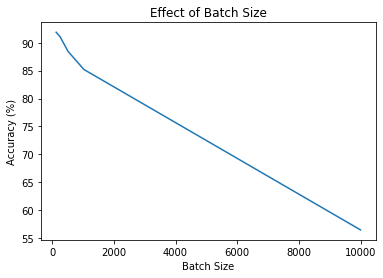

In [123]:
# check effect of batch size

plt.plot(batch_sizes, batch_acc)
plt.title("Effect of Batch Size")
plt.xlabel("Batch Size")
plt.ylabel("Accuracy (%)")
plt.show()

Observation: As batch size increases, the overall trend is that the accuracy decreases. This may be attributed to the fact that larger batch sizes lead to poor generalisation and hence may tend to perform poor on examples outside train data. 

**OBSERVE EFFECT OF SIZE OF HIDDEN LAYER**

In [6]:
epochs = 100
alpha = 0.1
mu = 0
sigma = 1
batch_size = 128
P1 = [1024, 512, 256]
P2 = [512, 256, 128]
P3 = [256, 128, 64]

case_acc = []

for i in range(3):
  
  input = train_images.shape[1]
  p1 = P1[i]
  p2 = P2[i]
  p3 = P3[i]
  output = 10

  W1, W2, W3, W4, b1, b2, b3, b4 = init(input, p1, p2, p3, output, mu, sigma)

  for i in range(epochs):
    
    for j in range(test_images.shape[0]//batch_size):

      x = train_images[j*batch_size:(j+1)*batch_size]
      y = train_labels[j*batch_size:(j+1)*batch_size]
    
      input, z1, a1, z2, a2, z3, a3, z4, output = forward(W1, W2, W3, W4, b1, b2, b3, b4, x)
      dW1, dW2, dW3, dW4, dB1, dB2, dB3, dB4 = backward(batch_size, x, z1, a1, z2, a2, z3, a3, z4, output, y, W1, W2, W3, W4)
      W1, W2, W3, W4, b1, b2, b3, b4 =  update(W1, W2, W3, W4, b1, b2, b3, b4, dW1, dW2, dW3, dW4, dB1, dB2, dB3, dB4, alpha)

  acc = []

  for b in range(test_images.shape[0]//batch_size):

    x = test_images[b*batch_size:(b+1)*batch_size]
    y = test_labels[b*batch_size:(b+1)*batch_size]

    input, z1, a1, z2, a2, z3, a3, z4, output = forward(W1, W2, W3, W4, b1, b2, b3, b4, x)
    pred = tf.math.argmax(output, axis = 1)
    batch_accuracy = tf.reduce_mean(tf.cast(tf.equal(pred, tf.cast(y, dtype=tf.int64)), tf.float64))
    acc.append(batch_accuracy*100)  
    
  case_acc.append(sum(acc)/len(acc))
  tf.print("Nodes in hidden layer 1:", p1, "Nodes in hidden layer 2:", p2, "Nodes in hidden layer 3:", p3, " - Accuracy: ", sum(acc)/len(acc), "%")    

Nodes in hidden layer 1: 1024 Nodes in hidden layer 2: 512 Nodes in hidden layer 3: 256  - Accuracy:  83.834134615384613 %
Nodes in hidden layer 1: 512 Nodes in hidden layer 2: 256 Nodes in hidden layer 3: 128  - Accuracy:  84.164663461538467 %
Nodes in hidden layer 1: 256 Nodes in hidden layer 2: 128 Nodes in hidden layer 3: 64  - Accuracy:  84.34495192307692 %


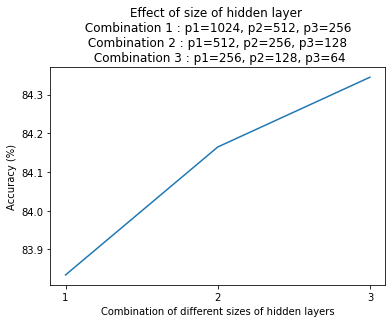

In [31]:
# check effect size of hiiden layer

plt.plot(np.array([1,2,3]), case_acc)
plt.title("Effect of size of hidden layer \n Combination 1 : p1=1024, p2=512, p3=256 \n Combination 2 : p1=512, p2=256, p3=128 \n Combination 3 : p1=256, p2=128, p3=64")
plt.xlabel("Combination of different sizes of hidden layers")
plt.xticks(np.array([1,2,3]))
plt.ylabel("Accuracy (%)")
plt.show()

Observation: As the number of in all layers decrease, the accuracy increases slightly. This a very minor change which can be attributed to the fact that large number of weights and biases can overfit the model, but the pattern is not consistent all the times and may vary with some other randomly initialised weights and biases. A possible justification for reverse pattern could be the model still has some more room for learning from extra weights and biases before it starts to overfits.

**VISUALISING WEIGHTS DURING TRAINING**

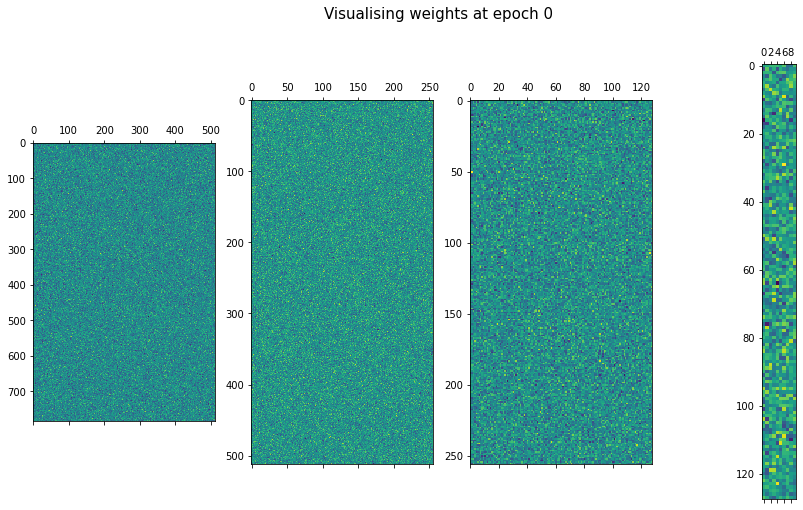

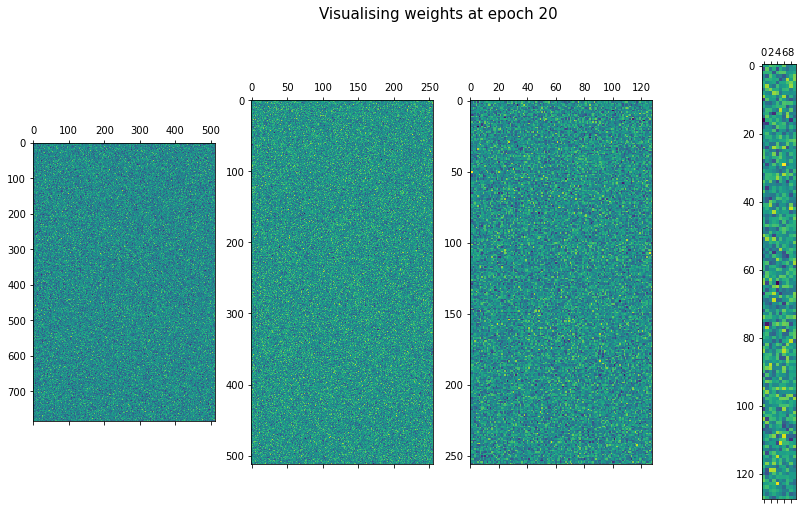

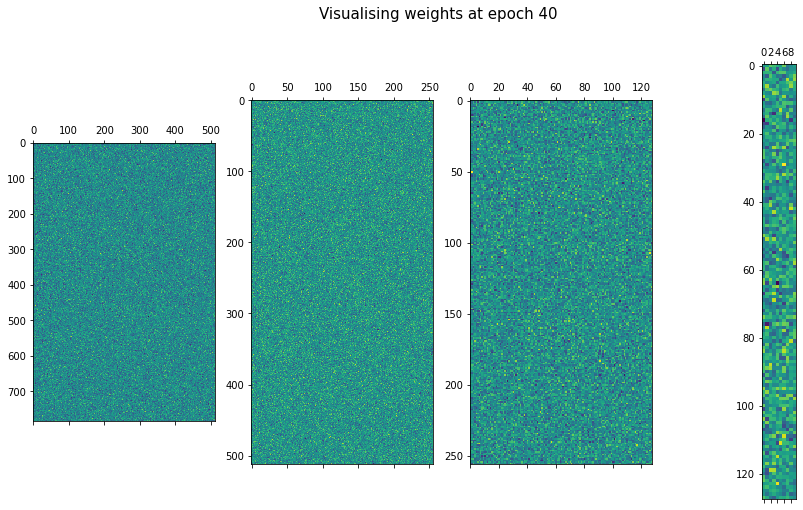

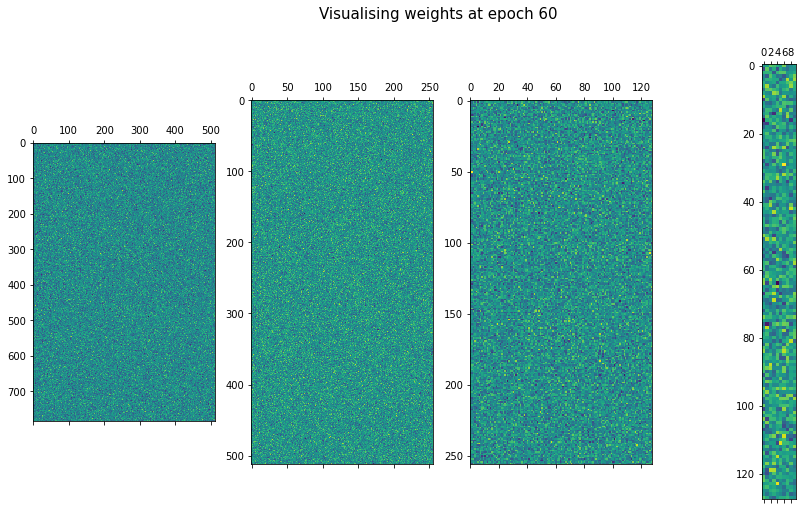

In [80]:
epochs = 100
alpha = 0.1
batch_size = 128
input = train_images.shape[1]
p1 = 512
p2 = 256
p3 = 128
output = 10
mu = 0
sigma = 1

W1, W2, W3, W4, b1, b2, b3, b4 = init(input, p1, p2, p3, output, mu, sigma)

for i in range(epochs):

  for j in range(train_images.shape[0]//batch_size):

    x = train_images[j*batch_size:(j+1)*batch_size]
    y = train_labels[j*batch_size:(j+1)*batch_size]
    input, z1, a1, z2, a2, z3, a3, z4, output = forward(W1, W2, W3, W4, b1, b2, b3, b4, x)
    dW1, dW2, dW3, dW4, dB1, dB2, dB3, dB4 = backward(batch_size, x, z1, a1, z2, a2, z3, a3, z4, output, y, W1, W2, W3, W4)
    W1, W2, W3, W4, b1, b2, b3, b4 =  update(W1, W2, W3, W4, b1, b2, b3, b4, dW1, dW2, dW3, dW4, dB1, dB2, dB3, dB4, alpha)
  
  if(i%20 == 0):

    fig = plt.figure(figsize=(15,8))
    plt.suptitle("Visualising weights at epoch " + str(i), fontsize=15)
    ax1 = fig.add_subplot(1,4,1)
    ax1.matshow(np.asarray(W1))
    ax2 = fig.add_subplot(1,4,2)
    ax2.matshow(np.asarray(W2))
    ax3 = fig.add_subplot(1,4,3)
    ax3.matshow(np.asarray(W3))
    ax4 = fig.add_subplot(1,4,4)
    ax4.matshow(np.asarray(W4))

Observation: The change is weight matrices with epochs are significant enough to train the model, but the change is not suffiecint enough to be visualised by color gradients. So the weight matrices appear visually similar throughout training, although numerically different.

**VISUALISING LAYER OUTPUTS WHILE PREDICTING**

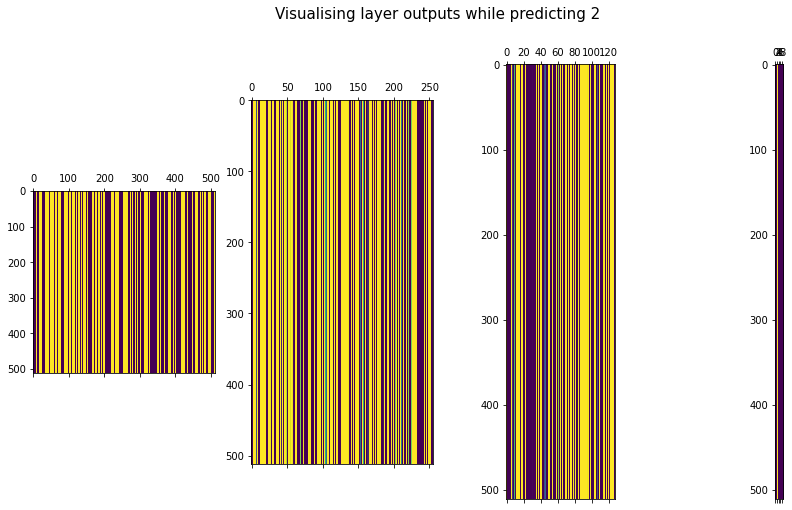

In [87]:
# output corresponding to image of 7
input, z1, a1, z2, a2, z3, a3, z4, output = forward(W1, W2, W3, W4, b1, b2, b3, b4, test_images[:1])
fig = plt.figure(figsize=(15,8))
plt.suptitle("Visualising layer outputs while predicting 7", fontsize=15)
ax1 = fig.add_subplot(1,4,1)
ax1.matshow(np.asarray(a1))
ax2 = fig.add_subplot(1,4,2)
ax2.matshow(np.asarray(a2))
ax3 = fig.add_subplot(1,4,3)
ax3.matshow(np.asarray(a3))
ax4 = fig.add_subplot(1,4,4)
ax4.matshow(np.asarray(output))

# output corresponding to image of 2
input, z1, a1, z2, a2, z3, a3, z4, output = forward(W1, W2, W3, W4, b1, b2, b3, b4, test_images[1:2])
fig = plt.figure(figsize=(15,8))
plt.suptitle("Visualising layer outputs while predicting 2", fontsize=15)
ax1 = fig.add_subplot(1,4,1)
ax1.matshow(np.asarray(a1))
ax2 = fig.add_subplot(1,4,2)
ax2.matshow(np.asarray(a2))
ax3 = fig.add_subplot(1,4,3)
ax3.matshow(np.asarray(a3))
ax4 = fig.add_subplot(1,4,4)
ax4.matshow(np.asarray(output))

Observation: The layer outputs differ for different class, but visual analysis cannot tell about what class it is.

# QUESTION 2 - CIFAR DATASET

**LOAD DATASET**

In [30]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()

# flatten the train and test images

tf.print("Dimension of loaded train images set:", train_images.shape)
train_images = train_images.reshape(train_images.shape[0],train_images.shape[1]*train_images.shape[2]*train_images.shape[3])
tf.print("Dimension of flattened train images set:", train_images.shape)

tr_im = np.array(train_images)
tr_im = (tr_im - np.mean(tr_im, axis=0))/np.std(tr_im, axis=0)
train_images = tf.convert_to_tensor(tr_im, dtype=tf.float32)

tf.print("Dimension of loaded test images set:", test_images.shape)
test_images = test_images.reshape(test_images.shape[0],test_images.shape[1]*test_images.shape[2]*test_images.shape[3])
tf.print("Dimension of flattened test images set:", test_images.shape)

test_images = test_images/255

# encode train labels into one hot encoding

train_labels_ori = train_labels
y = np.zeros((train_images.shape[0],10))
for i in range(train_images.shape[0]):
  y[i][train_labels[i][0]]  = 1
train_labels = y
tf.print("Dimension of one hot encoded train labels:", train_labels.shape)

# typecast train and test images into float 

train_images = tf.cast(train_images,dtype = tf.float32)
train_labels = tf.cast(train_labels,dtype = tf.float32)
test_images = tf.cast(test_images,dtype = tf.float32)
test_labels = tf.cast(test_labels,dtype = tf.float32)

Dimension of loaded train images set: (50000, 32, 32, 3)
Dimension of flattened train images set: (50000, 3072)
Dimension of loaded test images set: (10000, 32, 32, 3)
Dimension of flattened test images set: (10000, 3072)
Dimension of one hot encoded train labels: (50000, 10)


**BUILD AND TRAIN MODEL**

In [ ]:
epochs = 200
alpha = 0.9
batch_size = 250
input = train_images.shape[1]
p1 = 512
p2 = 512
p3 = 256
output = 10
mu = 0
sigma = 1

W1, W2, W3, W4, b1, b2, b3, b4 = init(input, p1, p2, p3, output, mu, sigma)

error = []
epoch_acc = []

for i in range(epochs):
  print("\r Epoch "+str(i), end="")

  epoch_errors = []

  for j in range(train_images.shape[0]//batch_size):

    x = train_images[j*batch_size:(j+1)*batch_size]
    y = train_labels[j*batch_size:(j+1)*batch_size]
    input, z1, a1, z2, a2, z3, a3, z4, output = forward(W1, W2, W3, W4, b1, b2, b3, b4, x)
    er = loss(y, output)
    epoch_errors.append(er)
    dW1, dW2, dW3, dW4, dB1, dB2, dB3, dB4 = backward(batch_size, x, z1, a1, z2, a2, z3, a3, z4, output, y, W1, W2, W3, W4)
    W1, W2, W3, W4, b1, b2, b3, b4 =  update(W1, W2, W3, W4, b1, b2, b3, b4, dW1, dW2, dW3, dW4, dB1, dB2, dB3, dB4, alpha)
    
  error.append(np.mean(epoch_errors))

  acc = []

  for b in range(train_images.shape[0]//batch_size):

    x = train_images[b*batch_size:(b+1)*batch_size]
    y = train_labels_ori[b*batch_size:(b+1)*batch_size]

    input, z1, a1, z2, a2, z3, a3, z4, output = forward(W1, W2, W3, W4, b1, b2, b3, b4, x)
    pred = tf.math.argmax(output, axis = 1)
    batch_accuracy = tf.reduce_mean(tf.cast(tf.equal(pred, tf.cast(y, dtype=tf.int64)), tf.float64))
    acc.append(batch_accuracy*100)  
    
  epoch_acc.append(sum(acc)/len(acc))

 Epoch 6

In [ ]:
# check training accuracy with epoch
plt.plot(epoch_acc)
plt.title("Training accuracy with epochs")
plt.xlabel("Number of Epochs")
plt.ylabel("Training Accuracy (%)")
plt.show()

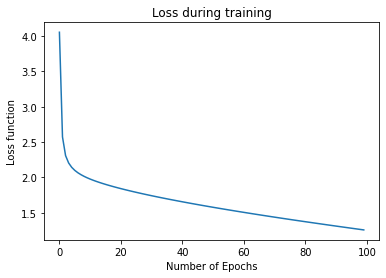

In [24]:
# check training loss
error =  [abs(ele) for ele in error] 
plt.plot(error)
plt.title("Loss during training")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss function")
plt.show()

**TEST THE MODEL AND PRINT SAMPLE CONFUSION MATRIX**

In [117]:
acc = []

for b in range(test_images.shape[0]//batch_size):

  x = test_images[b*batch_size:(b+1)*batch_size]
  y = test_labels[b*batch_size:(b+1)*batch_size]

  input, z1, a1, z2, a2, z3, a3, z4, output = forward(W1, W2, W3, W4, b1, b2, b3, b4, x)
  pred = tf.math.argmax(output, axis = 1)
  batch_accuracy = tf.reduce_mean(tf.cast(tf.equal(pred, tf.cast(y, dtype=tf.int64)), tf.float64))
  acc.append(batch_accuracy*100)  
  
tf.print("Test Accuracy: ", sum(acc)/len(acc), "% \n")
tf.print("Confusion Matrix:")
tf.print(tf.math.confusion_matrix(tf.cast(y, dtype=tf.int64), pred), summarize=-1)

Test Accuracy:  10.059258876702724 % 

Confusion Matrix:
[[15 0 3 0 1 1 1 0 9 2]
 [4 8 1 3 0 2 0 0 8 2]
 [12 0 4 4 4 2 0 1 2 1]
 [2 0 3 6 1 4 2 0 2 1]
 [5 0 2 5 3 4 1 1 3 2]
 [8 0 1 1 1 7 1 1 5 0]
 [6 0 2 5 1 2 1 1 0 1]
 [6 2 4 4 1 3 0 1 3 0]
 [10 1 0 2 0 1 0 0 13 0]
 [3 2 0 4 1 1 1 1 9 2]]


In [118]:
acc = []

for b in range(test_images.shape[0]//batch_size):

  x = train_images[b*batch_size:(b+1)*batch_size]
  y = train_labels_ori[b*batch_size:(b+1)*batch_size]

  input, z1, a1, z2, a2, z3, a3, z4, output = forward(W1, W2, W3, W4, b1, b2, b3, b4, x)
  pred = tf.math.argmax(output, axis = 1)
  batch_accuracy = tf.reduce_mean(tf.cast(tf.equal(pred, tf.cast(y, dtype=tf.int64)), tf.float64))
  acc.append(batch_accuracy*100)  
  
tf.print("Train Accuracy: ", sum(acc)/len(acc), "% \n")
tf.print("Confusion Matrix:")
tf.print(tf.math.confusion_matrix(tf.cast(y, dtype=tf.int64), pred), summarize=-1)

Train Accuracy:  10.320536295572916 % 

Confusion Matrix:
[[26 0 0 0 0 0 0 0 0 0]
 [0 27 0 0 0 0 0 0 0 0]
 [0 0 23 0 0 0 0 0 0 0]
 [0 0 0 31 0 0 0 0 0 0]
 [0 0 0 0 32 0 0 0 0 0]
 [0 0 0 0 0 18 0 0 0 0]
 [0 0 0 0 0 0 37 0 0 0]
 [0 0 0 0 0 0 0 22 0 0]
 [0 0 0 0 0 0 0 0 19 0]
 [0 0 0 0 0 0 0 0 0 21]]


**OBSERVE EFFECT OF ACTIVATION FUNCTION**

Important note - since this is a muticlass classification, softmax works best for the output layer. <br>
Options for hidden layer - sigmoid, relu, tanh, etc. <br>
Observation - relu has no positive upper bound so it may give large values which may be a problem because the final layer is softmax which will map majority values close to 1 and hence will be unable to distinguish between different classes. So sigmoid is a better option for hidden layers provided the network is not extremely deep to cause vanishing gradients. tanh performs comparable to sigmoid.

**OBSERVE EFFECT OF BATCH SIZE**

In [5]:
epochs = 100
alpha = 0.09
mu = 0
sigma = 1
batch_sizes = [128, 256, 512, 1024, test_images.shape[0]]

batch_acc = []

for batch_size in batch_sizes:
  
  input = train_images.shape[1]
  p1 = 256
  p2 = 128
  p3 = 64
  output = 10

  W1, W2, W3, W4, b1, b2, b3, b4 = init(input, p1, p2, p3, output, mu, sigma)

  for i in range(epochs):
    
    for j in range(train_images.shape[0]//batch_size):

      x = train_images[j*batch_size:(j+1)*batch_size]
      y = train_labels[j*batch_size:(j+1)*batch_size]
    
      input, z1, a1, z2, a2, z3, a3, z4, output = forward(W1, W2, W3, W4, b1, b2, b3, b4, x)
      dW1, dW2, dW3, dW4, dB1, dB2, dB3, dB4 = backward(batch_size, x, z1, a1, z2, a2, z3, a3, z4, output, y, W1, W2, W3, W4)
      W1, W2, W3, W4, b1, b2, b3, b4 =  update(W1, W2, W3, W4, b1, b2, b3, b4, dW1, dW2, dW3, dW4, dB1, dB2, dB3, dB4, alpha)

  acc = []

  for b in range(test_images.shape[0]//batch_size):

    x = test_images[b*batch_size:(b+1)*batch_size]
    y = test_labels[b*batch_size:(b+1)*batch_size]

    input, z1, a1, z2, a2, z3, a3, z4, output = forward(W1, W2, W3, W4, b1, b2, b3, b4, x)
    pred = tf.math.argmax(output, axis = 1)
    batch_accuracy = tf.reduce_mean(tf.cast(tf.equal(pred, tf.cast(y, dtype=tf.int64)), tf.float64))
    acc.append(batch_accuracy*100)  
    
  batch_acc.append(sum(acc)/len(acc))
  tf.print("Batch size:", batch_size, " - Accuracy: ", sum(acc)/len(acc), "%")    

Batch size: 128  - Accuracy:  10.089815579927885 %
Batch size: 256  - Accuracy:  10.084494566306089 %
Batch size: 512  - Accuracy:  9.99858253880551 %
Batch size: 1024  - Accuracy:  10.000377231174046 %
Batch size: 10000  - Accuracy:  10 %


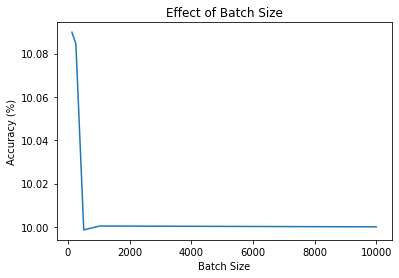

In [9]:
# check effect of batch size

plt.plot(batch_sizes, batch_acc)
plt.title("Effect of Batch Size")
plt.xlabel("Batch Size")
plt.ylabel("Accuracy (%)")
plt.show()

Observation: As batch size increases, the overall trend is that the accuracy decreases in general with some variations being because of random initialisations. This may be attributed to the fact that larger batch sizes lead to poor generalisation and hence may tend to perform poor on examples outside train data. 

**OBSERVE EFFECT OF SIZE OF HIDDEN LAYER**

In [11]:
epochs = 100
alpha = 0.09
mu = 0
sigma = 1
batch_size = 256
P1 = [2048, 512, 256]
P2 = [1024, 256, 128]
P3 = [256, 128, 64]

case_acc = []

for i in range(3):
  
  input = train_images.shape[1]
  p1 = P1[i]
  p2 = P2[i]
  p3 = P3[i]
  output = 10

  W1, W2, W3, W4, b1, b2, b3, b4 = init(input, p1, p2, p3, output, mu, sigma)

  for i in range(epochs):
    
    for j in range(test_images.shape[0]//batch_size):

      x = train_images[j*batch_size:(j+1)*batch_size]
      y = train_labels[j*batch_size:(j+1)*batch_size]
    
      input, z1, a1, z2, a2, z3, a3, z4, output = forward(W1, W2, W3, W4, b1, b2, b3, b4, x)
      dW1, dW2, dW3, dW4, dB1, dB2, dB3, dB4 = backward(batch_size, x, z1, a1, z2, a2, z3, a3, z4, output, y, W1, W2, W3, W4)
      W1, W2, W3, W4, b1, b2, b3, b4 =  update(W1, W2, W3, W4, b1, b2, b3, b4, dW1, dW2, dW3, dW4, dB1, dB2, dB3, dB4, alpha)

  acc = []

  for b in range(test_images.shape[0]//batch_size):

    x = test_images[b*batch_size:(b+1)*batch_size]
    y = test_labels[b*batch_size:(b+1)*batch_size]

    input, z1, a1, z2, a2, z3, a3, z4, output = forward(W1, W2, W3, W4, b1, b2, b3, b4, x)
    pred = tf.math.argmax(output, axis = 1)
    batch_accuracy = tf.reduce_mean(tf.cast(tf.equal(pred, tf.cast(y, dtype=tf.int64)), tf.float64))
    acc.append(batch_accuracy*100)  
    
  case_acc.append(sum(acc)/len(acc))
  tf.print("Nodes in hidden layer 1:", p1, "Nodes in hidden layer 2:", p2, "Nodes in hidden layer 3:", p3, " - Accuracy: ", sum(acc)/len(acc), "%")    

Nodes in hidden layer 1: 2048 Nodes in hidden layer 2: 1024 Nodes in hidden layer 3: 256  - Accuracy:  10.008630997095352 %
Nodes in hidden layer 1: 512 Nodes in hidden layer 2: 256 Nodes in hidden layer 3: 128  - Accuracy:  10.023029033954327 %
Nodes in hidden layer 1: 256 Nodes in hidden layer 2: 128 Nodes in hidden layer 3: 64  - Accuracy:  10.015047513521635 %


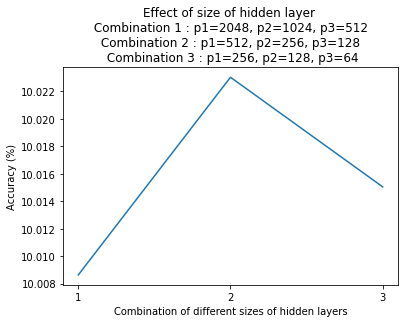

In [13]:
# check effect of size of hidden layer

plt.plot(np.array([1,2,3]), case_acc)
plt.title("Effect of size of hidden layer \n Combination 1 : p1=2048, p2=1024, p3=512 \n Combination 2 : p1=512, p2=256, p3=128 \n Combination 3 : p1=256, p2=128, p3=64")
plt.xlabel("Combination of different sizes of hidden layers")
plt.xticks(np.array([1,2,3]))
plt.ylabel("Accuracy (%)")
plt.show()

Observation: As the number of in all layers decrease, the accuracy chaneg is not predictable. There is a very minor increase which can be attributed to the fact that large number of weights and biases can overfit the model, but the pattern is not consistent all the times and may vary with some other randomly initialised weights and biases. A possible justification for reverse pattern could be the model still has some more room for learning from extra weights and biases before it starts to overfits. Hence the peak in the curve.

**VISUALISING WEIGHTS DURING TRAINING**

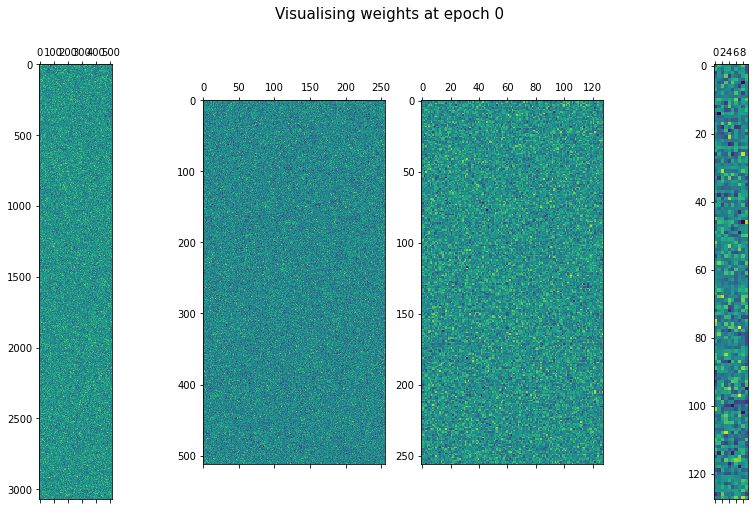

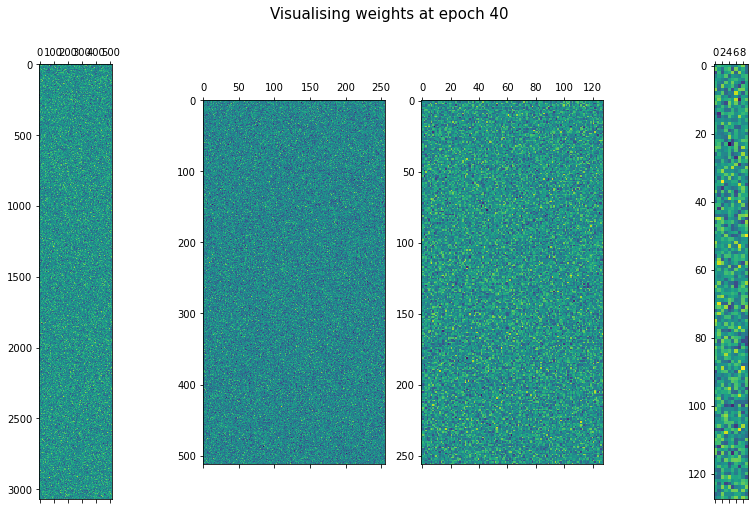

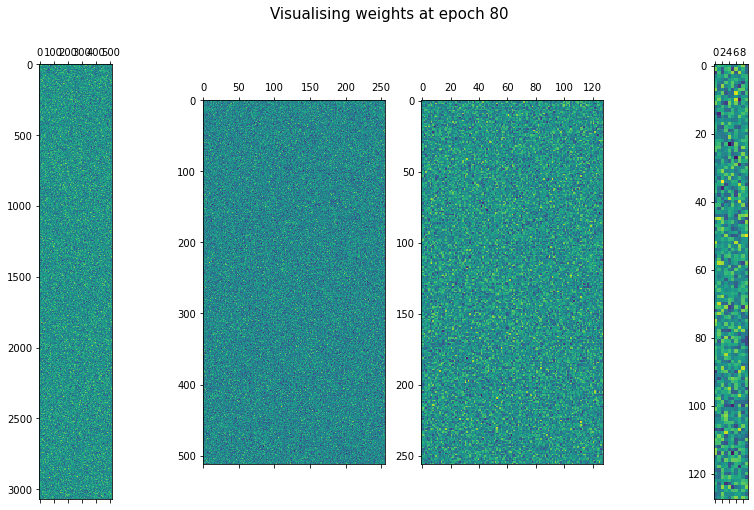

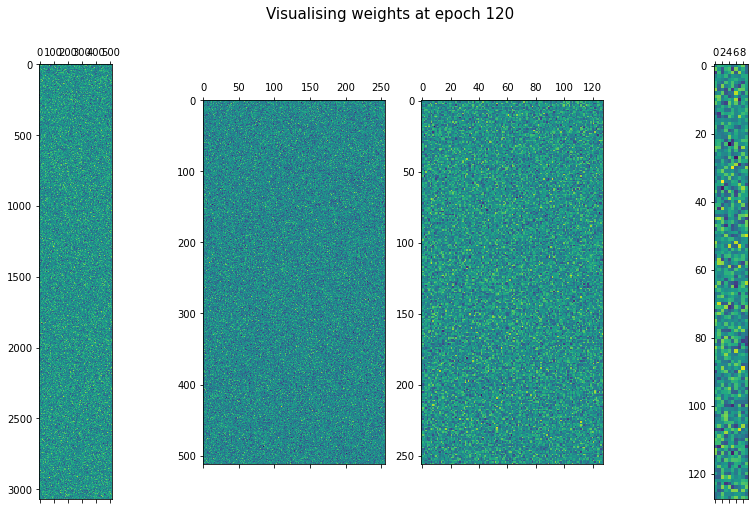

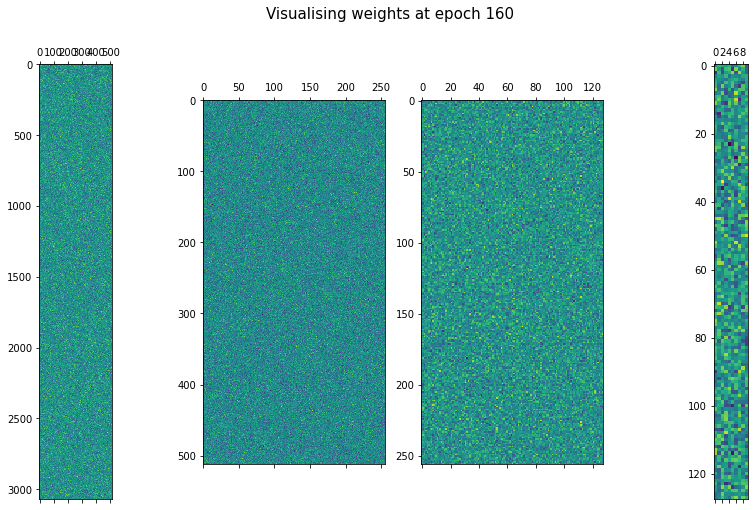

In [16]:
epochs = 100
alpha = 0.09
batch_size = 256
input = train_images.shape[1]
p1 = 512
p2 = 256
p3 = 128
output = 10
mu = 0
sigma = 1

W1, W2, W3, W4, b1, b2, b3, b4 = init(input, p1, p2, p3, output, mu, sigma)

for i in range(epochs):

  for j in range(train_images.shape[0]//batch_size):

    x = train_images[j*batch_size:(j+1)*batch_size]
    y = train_labels[j*batch_size:(j+1)*batch_size]
    input, z1, a1, z2, a2, z3, a3, z4, output = forward(W1, W2, W3, W4, b1, b2, b3, b4, x)
    dW1, dW2, dW3, dW4, dB1, dB2, dB3, dB4 = backward(batch_size, x, z1, a1, z2, a2, z3, a3, z4, output, y, W1, W2, W3, W4)
    W1, W2, W3, W4, b1, b2, b3, b4 =  update(W1, W2, W3, W4, b1, b2, b3, b4, dW1, dW2, dW3, dW4, dB1, dB2, dB3, dB4, alpha)
  
  if(i%40 == 0):

    fig = plt.figure(figsize=(15,8))
    plt.suptitle("Visualising weights at epoch " + str(i), fontsize=15)
    ax1 = fig.add_subplot(1,4,1)
    ax1.matshow(np.asarray(W1))
    ax2 = fig.add_subplot(1,4,2)
    ax2.matshow(np.asarray(W2))
    ax3 = fig.add_subplot(1,4,3)
    ax3.matshow(np.asarray(W3))
    ax4 = fig.add_subplot(1,4,4)
    ax4.matshow(np.asarray(W4))

Observation: The change is weight matrices with epochs are significant enough to train the model, but the change is not suffiecint enough to be visualised by color gradients. So the weight matrices appear visually similar throughout training, although numerically different.

**VISUALISING LAYER OUTPUTS WHILE PREDICTING**

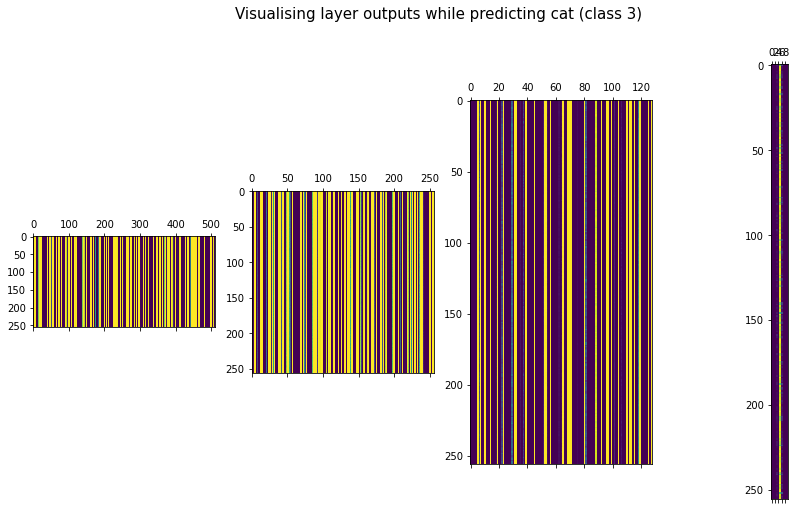

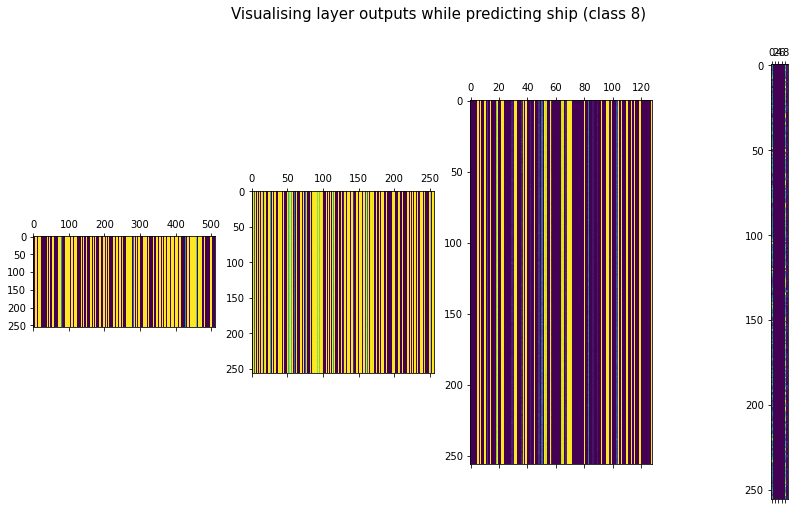

In [20]:
# output corresponding to image of cat (class 3)
input, z1, a1, z2, a2, z3, a3, z4, output = forward(W1, W2, W3, W4, b1, b2, b3, b4, test_images[:1])
fig = plt.figure(figsize=(15,8))
plt.suptitle("Visualising layer outputs while predicting cat (class 3)", fontsize=15)
ax1 = fig.add_subplot(1,4,1)
ax1.matshow(np.asarray(a1))
ax2 = fig.add_subplot(1,4,2)
ax2.matshow(np.asarray(a2))
ax3 = fig.add_subplot(1,4,3)
ax3.matshow(np.asarray(a3))
ax4 = fig.add_subplot(1,4,4)
ax4.matshow(np.asarray(output))

# output corresponding to image of ship (class 8)
input, z1, a1, z2, a2, z3, a3, z4, output = forward(W1, W2, W3, W4, b1, b2, b3, b4, test_images[1:2])
fig = plt.figure(figsize=(15,8))
plt.suptitle("Visualising layer outputs while predicting ship (class 8)", fontsize=15)
ax1 = fig.add_subplot(1,4,1)
ax1.matshow(np.asarray(a1))
ax2 = fig.add_subplot(1,4,2)
ax2.matshow(np.asarray(a2))
ax3 = fig.add_subplot(1,4,3)
ax3.matshow(np.asarray(a3))
ax4 = fig.add_subplot(1,4,4)
ax4.matshow(np.asarray(output))

Observation: The layer outputs differ for different class, but visual analysis cannot tell about what class it is.

# COMPARING MNIST AND CIFAR DATASET

The black and white digit dataset MNIST gives fairly good accuracy over colored objects dataset CIFAR. The color scale of images could be a reason, the inability of a simpel model to identify complex objects as compared to simple disgits could be another reason. However, with both data the model trains better and better with every epoch as training accuracy increases each time, but somehow the model is not able to generalise well to unknown test data of CIFAR hence we get fairly good test accuracy for MNIST but poor test accuracy for CIFAR. Possibly, convolutional neural network could perform better on such a complex dataset.